In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [47]:
# read the dataset
df = pd.read_csv('C:\\Users\\jatin\\Desktop\\spam.csv',encoding='latin-1')

print('data imported')

data imported


In [48]:
df=df.dropna(how='any',axis=1)


In [49]:
df.columns=['target','message']


In [50]:
df.head()

,target,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [51]:
df.duplicated().sum()


403

In [52]:
df=df.drop_duplicates()

In [53]:
df.message[1]

'Ok lar... Joking wif u oni...'

In [54]:
# Calculate the length of each message
df['text_len']=df['message'].apply(lambda x:len(x.split(' ')))

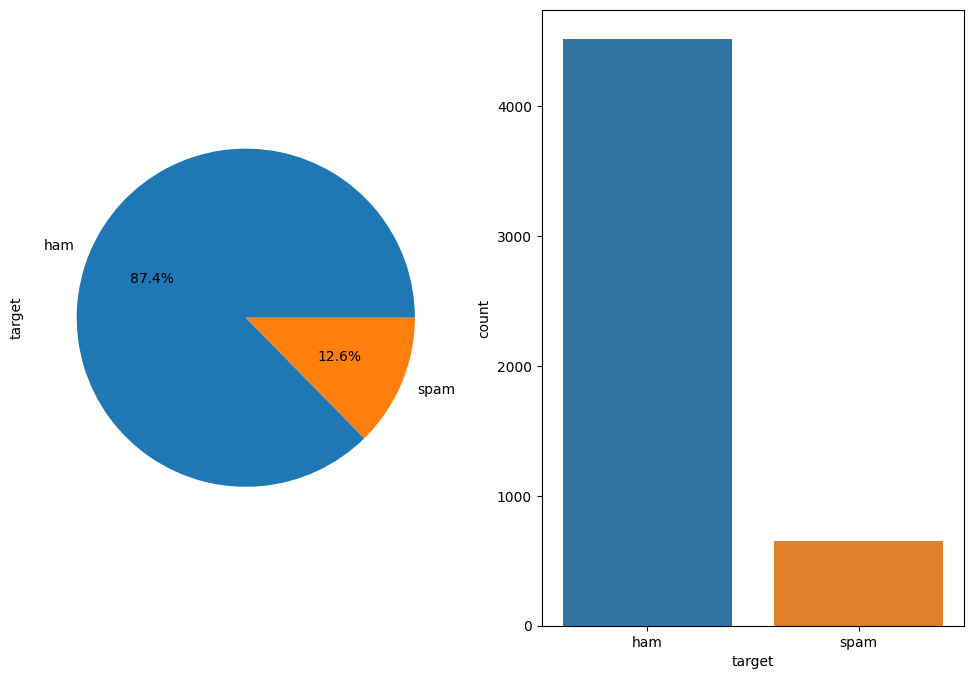

In [55]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
df['target'].value_counts().plot(kind='pie',autopct='%1.1f%%')

plt.subplot(1,2,2)
sns.countplot(x='target',data=df)
plt.show()

In [56]:
# lowercase
def clean_text(text):
    text=text.lower()
    return text.strip()

In [57]:
df['new_message']=df.message.apply(lambda x:clean_text(x))

In [58]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [59]:
def remove_pun(text):
    pun_free_text="".join([i for i in text if i not in string.punctuation])
    return pun_free_text

In [60]:
df['new_message']=df.new_message.apply(lambda x:remove_pun(x))


In [61]:
df.head()

,target,message,text_len,new_message
0,ham,"Go until jurong point, crazy.. Available only ...",20,go until jurong point crazy available only in ...
1,ham,Ok lar... Joking wif u oni...,6,ok lar joking wif u oni
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,free entry in 2 a wkly comp to win fa cup fina...
3,ham,U dun say so early hor... U c already then say...,11,u dun say so early hor u c already then say
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,nah i dont think he goes to usf he lives aroun...


In [62]:
# Tokenization
import re
def tokenization(text):
    tokens=re.split('W+',text)
    return tokens

In [63]:
df['new_message']=df.new_message.apply(lambda x:tokenization(x))

In [64]:
# remove stop words
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\jatin\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [65]:
stopwords = nltk.corpus.stopwords.words('english')

In [66]:
stopwords[:10]

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [67]:
def remove_stop(text):
    output=" ".join(i for i in str(text).split() if i not in stopwords)
    return output

In [68]:
df['new_message']=df.new_message.apply(lambda x:remove_stop(x))

In [69]:
stemmer=nltk.SnowballStemmer('english')
df['new_message']=df.new_message.apply(lambda x:" ".join([stemmer.stem(word) for word in x.split()]))

In [70]:
df.head()

,target,message,text_len,new_message
0,ham,"Go until jurong point, crazy.. Available only ...",20,['go jurong point crazi avail bugi n great wor...
1,ham,Ok lar... Joking wif u oni...,6,['ok lar joke wif u oni']
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,28,['free entri 2 wkli comp win fa cup final tkts...
3,ham,U dun say so early hor... U c already then say...,11,['u dun say earli hor u c alreadi say']
4,ham,"Nah I don't think he goes to usf, he lives aro...",13,['nah dont think goe usf live around though']


In [71]:
# clean the text
def clean_text(text):
    #text = re.sub('\[.*?\]','', text)# remove text in []
    text=re.sub('\S*\d\S*\s*','',text) # remove digits in word
    text=re.sub('\n','',text) # new line
    text=re.sub('https?://\S+|www\.\S+','',text) # remove url
    return text


In [72]:
df['new_message']=df['new_message'].apply(clean_text)

FROM HERE I WILL BE USING THE MACHINE LEARNING METHOD 

In [73]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['target']=le.fit_transform(df['target'])

In [74]:
X=df['new_message']
y=df['target']


In [75]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [76]:
# BOW model
from sklearn.feature_extraction.text import CountVectorizer
vec=CountVectorizer()
vec.fit(X_train)
X_train_bow=vec.transform(X_train)
X_test_bow=vec.transform(X_test)

In [77]:
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(X_train_bow,y_train)
print('training done')

training done


In [78]:
y_pred=nb.predict(X_test_bow)


In [79]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)



0.9791183294663574

DEEP LEARNING STARTS FROM HERE BITCHES

In [81]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM,Embedding,Dense,Dropout,Flatten,Activation,Input
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [85]:
X_train

5022    ['anyway holla whenev your around need excus g...
4411                     ['if said anyth wrong sorri de']
2930                                 ['hi test ltgt rd ']
3046    ['ok much though hm friday cant wait dunno wot...
331     ['mayb could get book tomo return immedi somet...
                              ...                        
4740        ['mani happi return day wish happi birthday']
474     ['nice line said broken heart plz dont cum tim...
3266                           ['ok come n pick u engin']
4016    ['eek that lot time especi sinc american pie l...
879     ['u secret admir look make contact ufind rreve...
Name: new_message, Length: 3876, dtype: object

In [82]:
max_words=1000
max_len=150 #so each batch inputs from the 1000 max corpus words
tok=Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train) #To indicate that we are going to fit the text data index for the training.



WE use the above to update the internal vocab based on list of test 

#voc Index - word freq
#Text = the cat sat on the mat

#word-index['the']=1

In [83]:
sequence=tok.texts_to_sequences(X_train)
sequence_matrix=pad_sequences(sequence,maxlen=max_len)

In [84]:
sequence_matrix

array([[  0,   0,   0, ..., 827,   3, 221],
       [  0,   0,   0, ..., 140, 621, 138],
       [  0,   0,   0, ..., 394,  10,  14],
       ...,
       [  0,   0,   0, ...,  35,  79,   1],
       [  0,   0,   0, ...,  55,  36, 121],
       [  0,   0,   0, ..., 110,  28,   7]])

In [86]:
#Example of this in real time 

t=Tokenizer()
text1=['The earth is awesome place to live']
t.fit_on_texts(text1)
test_text='The earth is great place to live'
sequence2=t.texts_to_sequences([test_text])
print(sequence2)
print('word index',t.word_index)

[[1, 2, 3, 5, 6, 7]]
word index {'the': 1, 'earth': 2, 'is': 3, 'awesome': 4, 'place': 5, 'to': 6, 'live': 7}


In [87]:
#in deeplearning model if we have 50 K images, we send them in batch sizes

#when when we take the corpus of max words,the model will get the max times occurnace and drop rest in the max limit

Build the Neural Network arch Complie the model


In [88]:
# Build the Neural network architecture LSTM RNN
def LSTM_model():
    inputs=Input(name='inputs',shape=[max_len])
    layer=Embedding(max_words,50,input_length=max_len)(inputs)
    layer=LSTM(64)(layer)
    layer=Dense(256,name='FC1')(layer)
    layer=Activation('relu')(layer)
    layer=Dropout(0.3)(layer)
    layer=Dense(1,name='out_layer')(layer)
    layer=Activation('sigmoid')(layer)
    model=Model(inputs=inputs,outputs=layer)
    return model
model=LSTM_model()
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 inputs (InputLayer)         [(None, 150)]             0         
                                                                 
 embedding (Embedding)       (None, 150, 50)           50000     
                                                                 
 lstm (LSTM)                 (None, 64)                29440     
                                                                 
 FC1 (Dense)                 (None, 256)               16640     
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 out_layer (Dense)           (None, 1)                 257   

In [89]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import LSTM,Embedding,Dense,Dropout,Flatten,Activation,Input
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [90]:
# 2. Compile the model
model.compile(loss='binary_crossentropy',optimizer='rmsprop',metrics=['accuracy'])
print('model is compiled')

model is compiled


In [91]:
# 3. fit the model
model.fit(sequence_matrix,y_train,epochs=20,batch_size=128,
         validation_split=0.2)

Epoch 1/20
25/25 [==============================] - 8s 157ms/step - loss: 0.4175 - accuracy: 0.8755 - val_loss: 0.2922 - val_accuracy: 0.8930
Epoch 2/20
25/25 [==============================] - 3s 139ms/step - loss: 0.2725 - accuracy: 0.8881 - val_loss: 0.1783 - val_accuracy: 0.9433
Epoch 3/20
25/25 [==============================] - 4s 139ms/step - loss: 0.1574 - accuracy: 0.9568 - val_loss: 0.1465 - val_accuracy: 0.9588
Epoch 4/20
25/25 [==============================] - 3s 139ms/step - loss: 0.0983 - accuracy: 0.9739 - val_loss: 0.0876 - val_accuracy: 0.9716
Epoch 5/20
25/25 [==============================] - 4s 157ms/step - loss: 0.0707 - accuracy: 0.9813 - val_loss: 0.0822 - val_accuracy: 0.9729
Epoch 6/20
25/25 [==============================] - 5s 183ms/step - loss: 0.0504 - accuracy: 0.9845 - val_loss: 0.0699 - val_accuracy: 0.9768
Epoch 7/20
25/25 [==============================] - 5s 216ms/step - loss: 0.0397 - accuracy: 0.9884 - val_loss: 0.0931 - val_accuracy: 0.9665
Epoch 

In [92]:
# evaluate the model on test data
test_sequence=tok.texts_to_sequences(X_test)
test_sequence_matrix=pad_sequences(test_sequence,maxlen=max_len)

In [93]:
# evaluate the model on test data
test_sequence=tok.texts_to_sequences(X_test)
test_sequence_matrix=pad_sequences(test_sequence,maxlen=max_len)

In [95]:
score=model.evaluate(test_sequence_matrix,y_test)
print('test loss=',score[0],'test_accuracy',score[1])

41/41 [==============================] - 1s 21ms/step - loss: 0.1269 - accuracy: 0.9667
test loss= 0.12689796090126038 test_accuracy 0.9667440056800842
